# Final Project - Individual  


### Hilal Elayoubi


## Question 1 :

***Predict the price of the car based on various features such as car name, fuel type, car length,
engine type, horse power, mileage, etc., to name a few. Use the Data Dictionary car prices to
know about the features and their datatypes in the dataset. Use the Car Price dataset, which
contains information about car and apply linear regression to predict the price of the car based
on various features.***

**Importing Libraries :**
    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

**Loading datasets :**


In [2]:
car_data = pd.read_csv('Car Price Prediction.csv')
data_dict = pd.read_excel('Data Dictionary - carprices.xlsx')

**First rows of the dataset :**


In [3]:
print(car_data.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

**Data dictionary :**

In [4]:
print(data_dict)

    Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0          NaN         NaN         NaN         NaN         NaN         NaN   
1          NaN         NaN         NaN         NaN         NaN         NaN   
2          NaN         NaN         NaN         NaN         NaN         NaN   
3          NaN         NaN         NaN         NaN         NaN         NaN   
4          NaN         NaN         NaN         NaN         NaN         NaN   
5          NaN         NaN         NaN         NaN         NaN         NaN   
6          NaN         NaN         NaN         NaN         NaN         NaN   
7          NaN         NaN         NaN         NaN         NaN         NaN   
8          NaN         NaN         NaN         NaN         NaN         NaN   
9          NaN         NaN         NaN         NaN         NaN         NaN   
10         NaN         NaN         NaN         NaN         NaN         NaN   
11         NaN         NaN         NaN         NaN         NaN  

**Basic information**

In [5]:
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**Statistics**

In [6]:
print(car_data.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

**Let's check for missig values in the dataset :**

In [7]:
print(car_data.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


**Show all the graphs**

C:\Users\hilal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


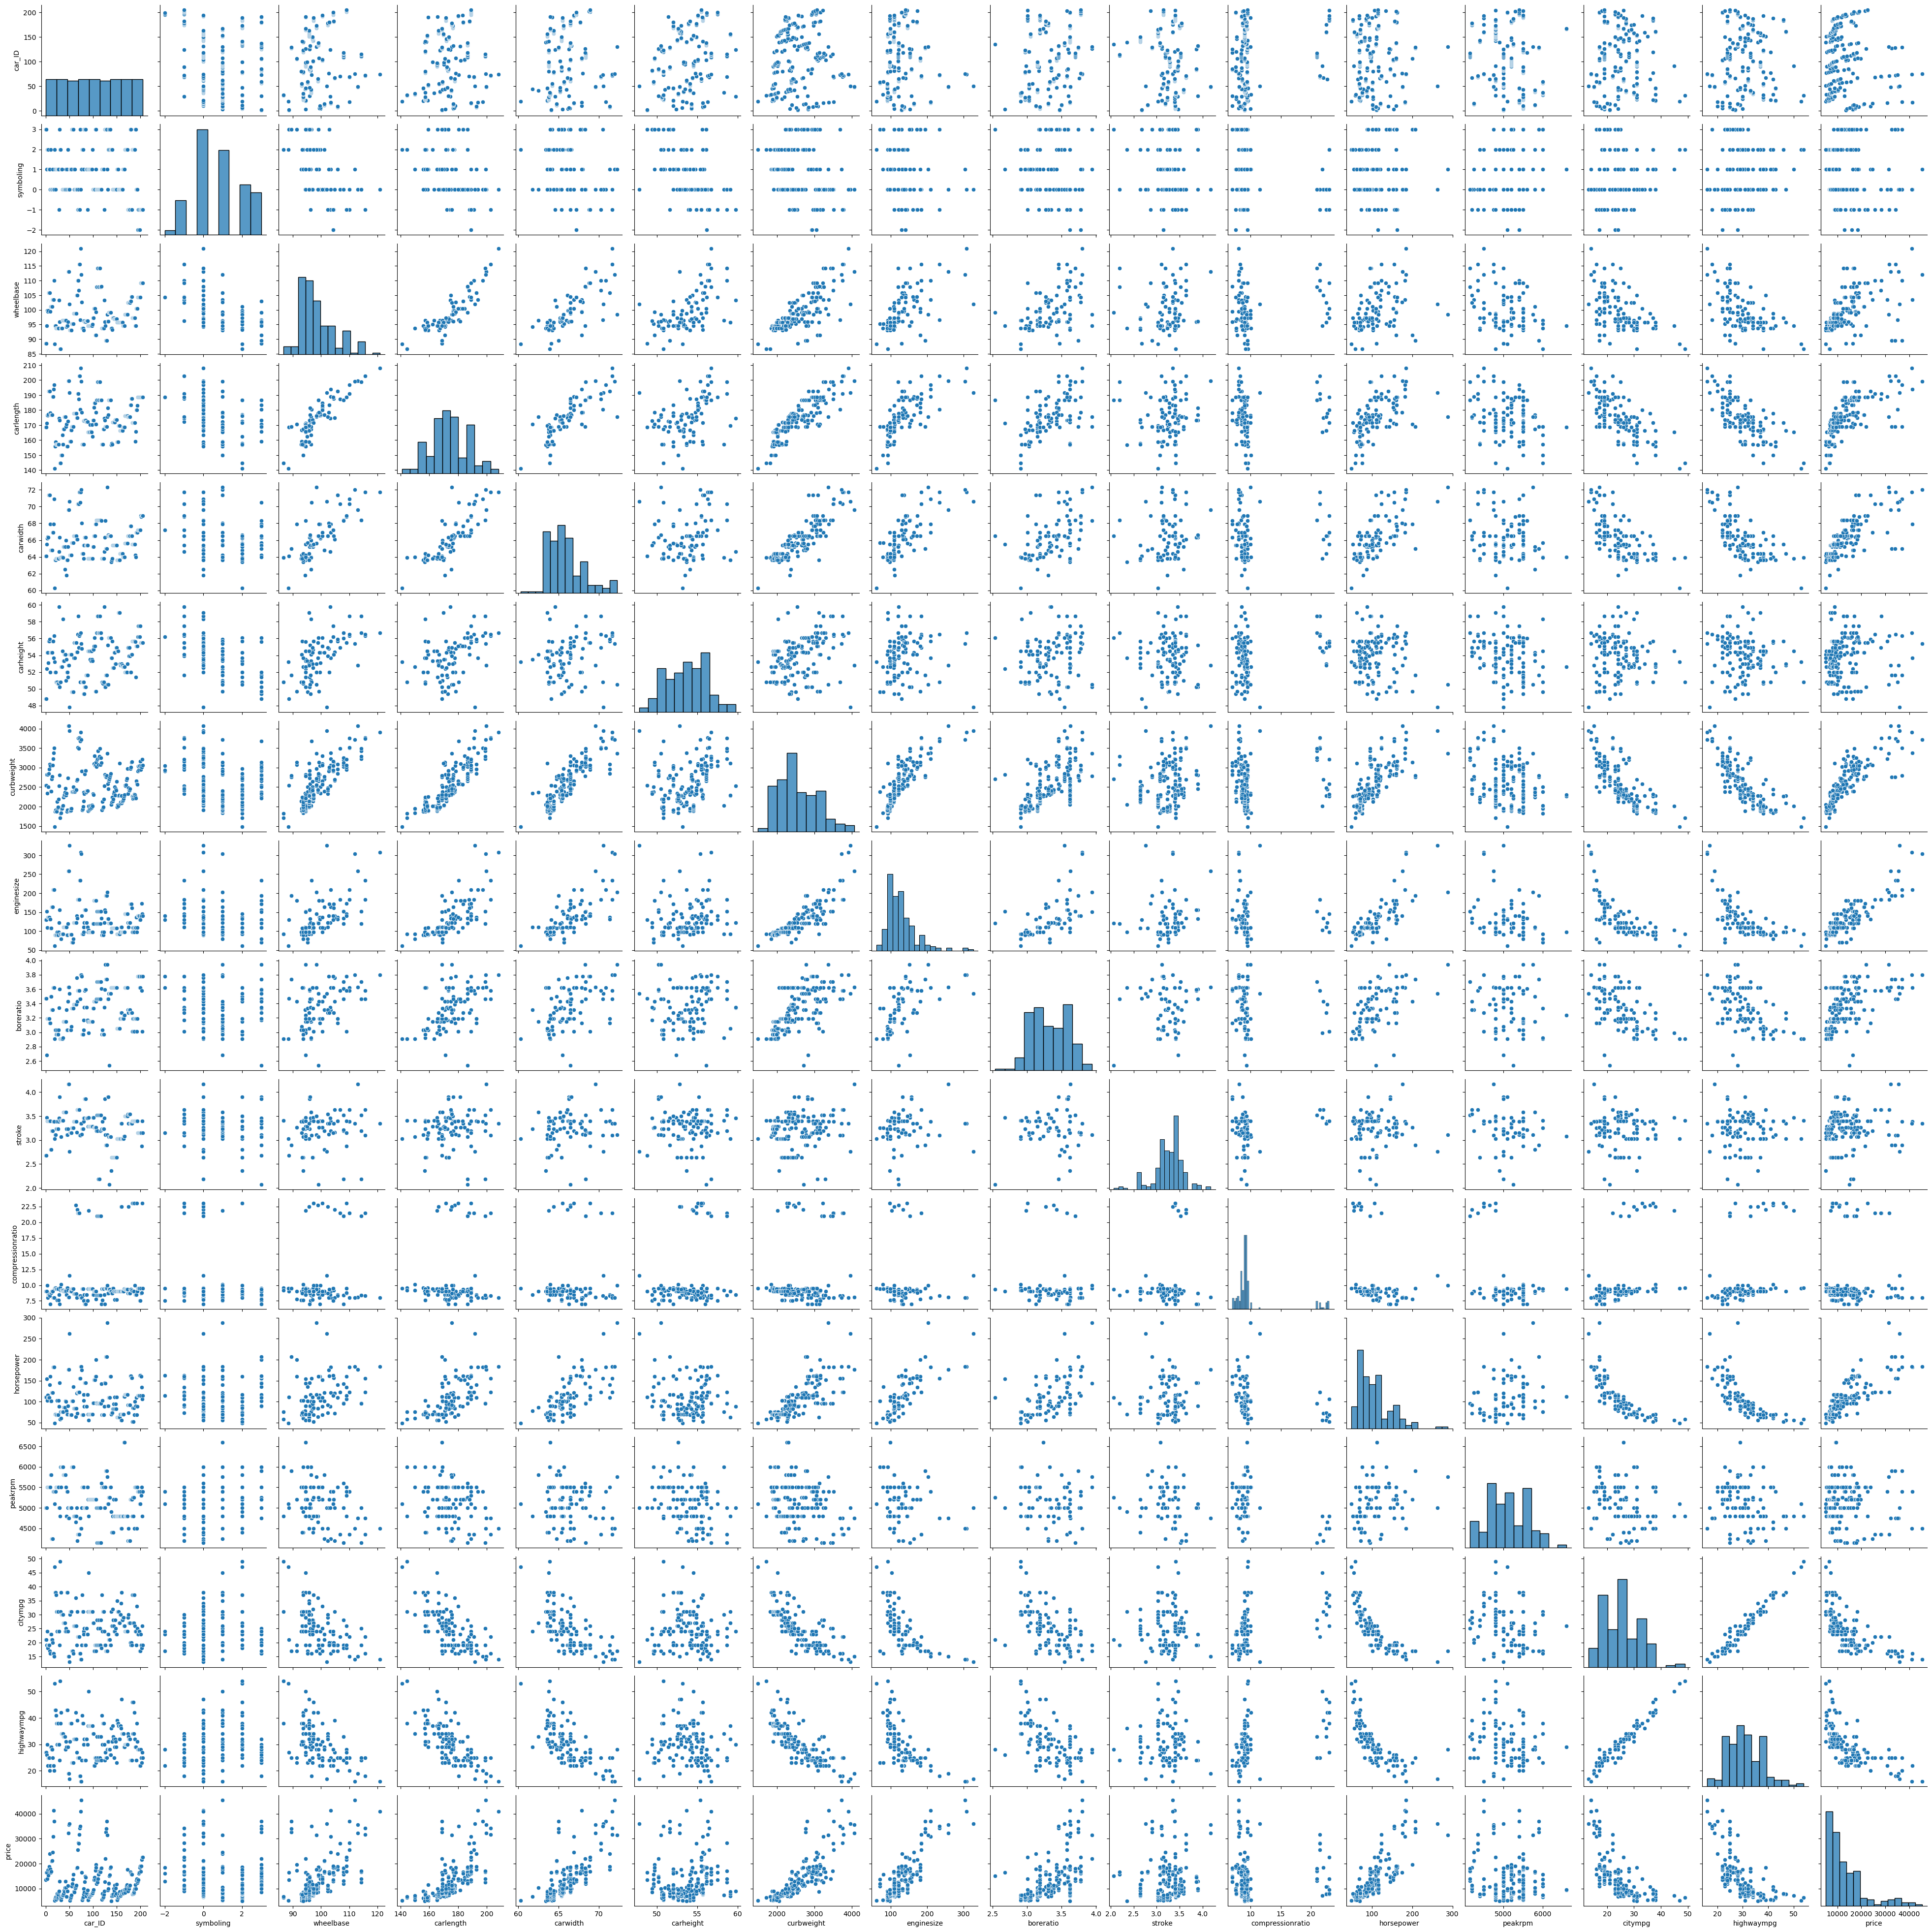

In [8]:
sns.pairplot(car_data)
plt.show()

**Correlation matrix**

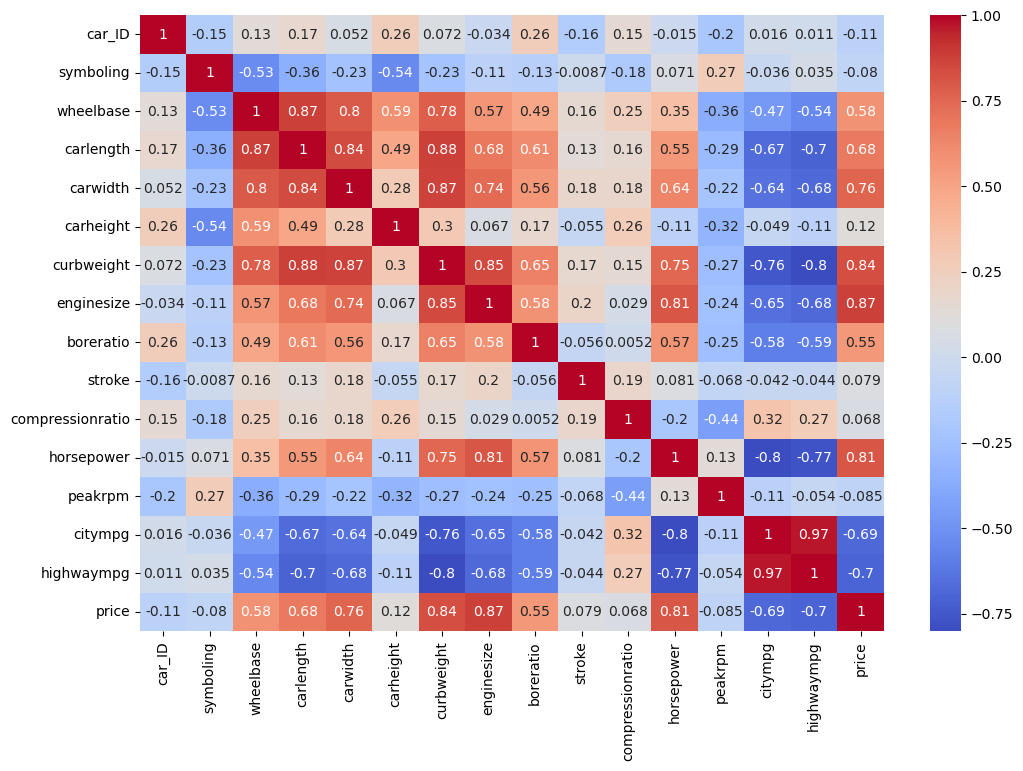

In [10]:
numeric_data = car_data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

**Handling missing values**

In [11]:
car_data[numeric_data.columns] = car_data[numeric_data.columns].fillna(car_data[numeric_data.columns].mean())
non_numeric_data = car_data.select_dtypes(exclude=[np.number])
car_data[non_numeric_data.columns] = car_data[non_numeric_data.columns].fillna(car_data[non_numeric_data.columns].mode().iloc[0])
car_data = pd.get_dummies(car_data, drop_first=True)
print(car_data.isnull().sum())

car_ID             0
symboling          0
wheelbase          0
carlength          0
carwidth           0
                  ..
fuelsystem_idi     0
fuelsystem_mfi     0
fuelsystem_mpfi    0
fuelsystem_spdi    0
fuelsystem_spfi    0
Length: 191, dtype: int64


**Creating train test values**

In [12]:
X = car_data.drop('price', axis=1) 
y = car_data['price']

**Features and target variable**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Creating the model**

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 176760096.86119097
R^2 Score: -1.2390561677957117


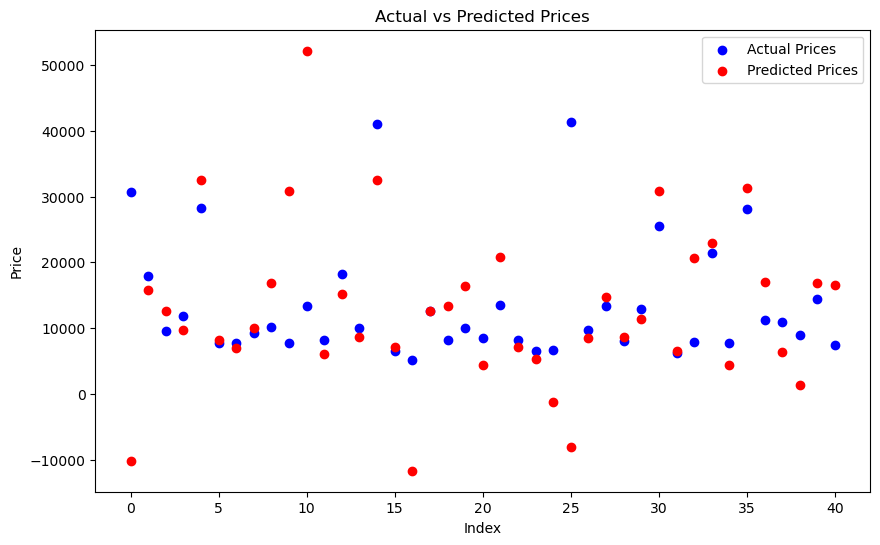

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Prices')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [ ]:
mse_values = [initial_mse, optimized_mse]
r2_values = [initial_r2, optimized_r2]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(['Initial', 'Optimized'], mse_values, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison')

plt.subplot(1, 2, 2)
plt.bar(['Initial', 'Optimized'], r2_values, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('R² Score Comparison')

plt.tight_layout()
plt.show()

**Hyper-parameter optimization :**

In [32]:
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('linear_regression', LinearRegression())
])

param_grid = {
    'poly_features__degree': [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

C:\Users\hilal\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hilal\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hilal\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hilal\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fit(X, y, **fit

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly_features', PolynomialFeatures()),
                                       ('linear_regression',
                                        LinearRegression())]),
             param_grid={'poly_features__degree': [1, 2, 3, 4, 5]},
             scoring='neg_mean_squared_error')

**Find the best estimator :**

In [33]:
best_model = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Best parameters: {'poly_features__degree': 3}
Mean Squared Error: 18704155.802982192
R^2 Score: 0.7630706468385386


**View results :**

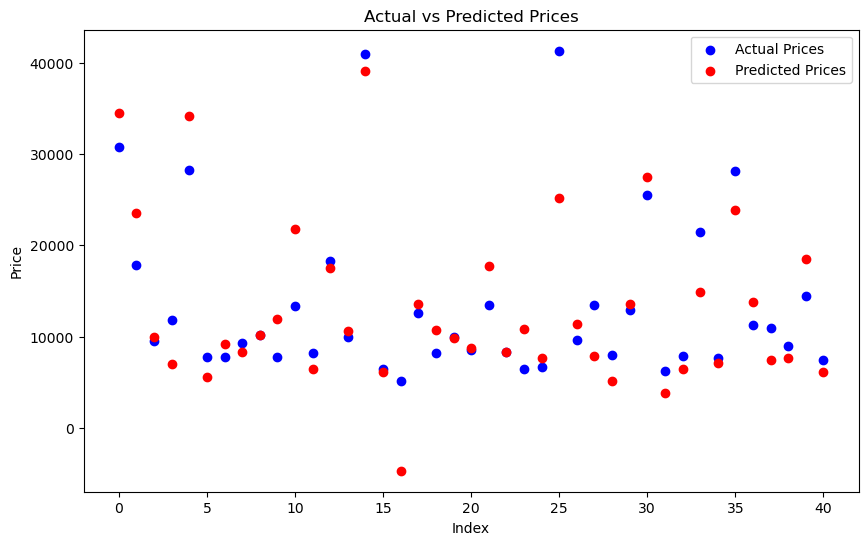

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Prices')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()



**Save the model :**

In [35]:
joblib.dump(best_model, 'car_price_model.pkl')

['car_price_model.pkl']

## Question 2 :

***Predict whether the patient is healthy (unlikely) or is not healthy (likely) to get a stroke based on
various features such as their gender, age, or their residence. Do they have heart disease? or
what is their work type? Do they have a smoking habit? to name a few of the features. Use
healthcare stroke dataset, which contains around 5000 records of the patients, and apply SVM
or Random Forest to classify the patient is healthy or needs medical assistance.***

**Importing Libraries :**

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Loading datasets :**

In [35]:
stroke_data2 = pd.read_csv('healthcare-dataset-stroke-data.csv')
data_dict2 = pd.read_excel('Data Dictionary - healthcare-stroke.xlsx')

**First rows of the dataset :**

In [36]:
print(stroke_data2.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


**Data dictionary :**

In [37]:
print(data_dict2)

    Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0          NaN         NaN         NaN         NaN         NaN         NaN   
1          NaN         NaN         NaN         NaN         NaN         NaN   
2          NaN         NaN         NaN         NaN         NaN         NaN   
3          NaN         NaN         NaN         NaN         NaN         NaN   
4          NaN         NaN         NaN         NaN         NaN         NaN   
5          NaN         NaN         NaN         NaN         NaN         NaN   
6          NaN         NaN         NaN         NaN         NaN         NaN   
7          NaN         NaN         NaN         NaN         NaN         NaN   
8          NaN         NaN         NaN         NaN         NaN         NaN   
9          NaN         NaN         NaN         NaN         NaN         NaN   
10         NaN         NaN         NaN         NaN         NaN         NaN   
11         NaN         NaN         NaN         NaN         NaN  

**Basic information**

In [38]:
print(stroke_data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


**Statistics :**

In [39]:
print(stroke_data2.describe())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

**Let's check for missig values in the dataset :**

In [40]:
print(stroke_data2.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


**Show all the graphs :**

C:\Users\hilal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


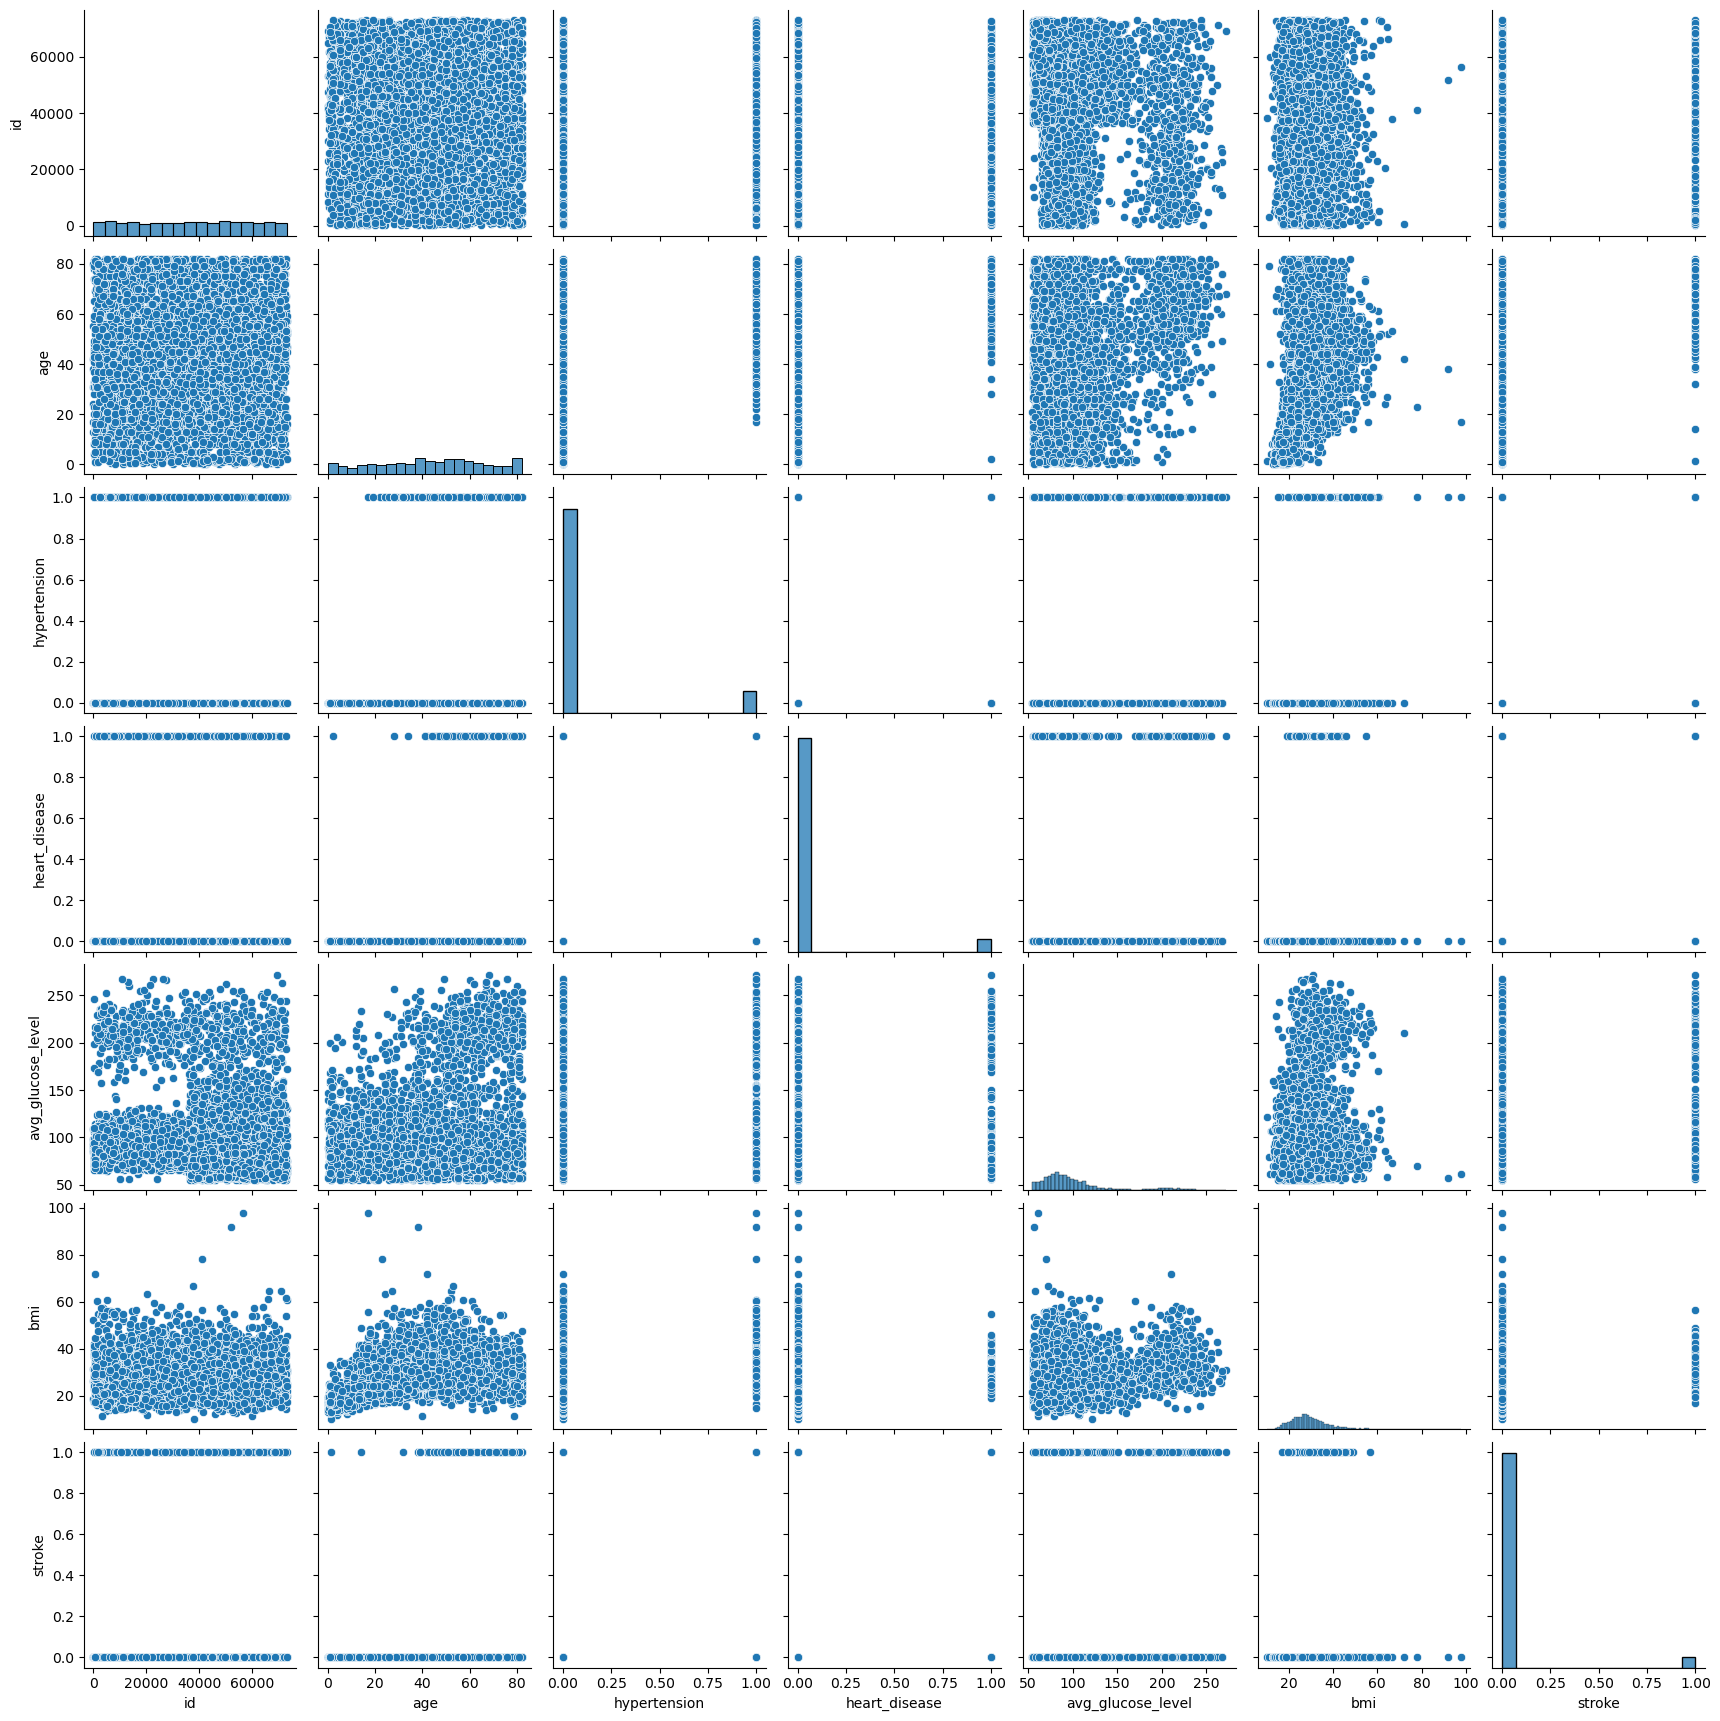

In [28]:
sns.pairplot(stroke_data2)
plt.show()

**Correlation matrix :**

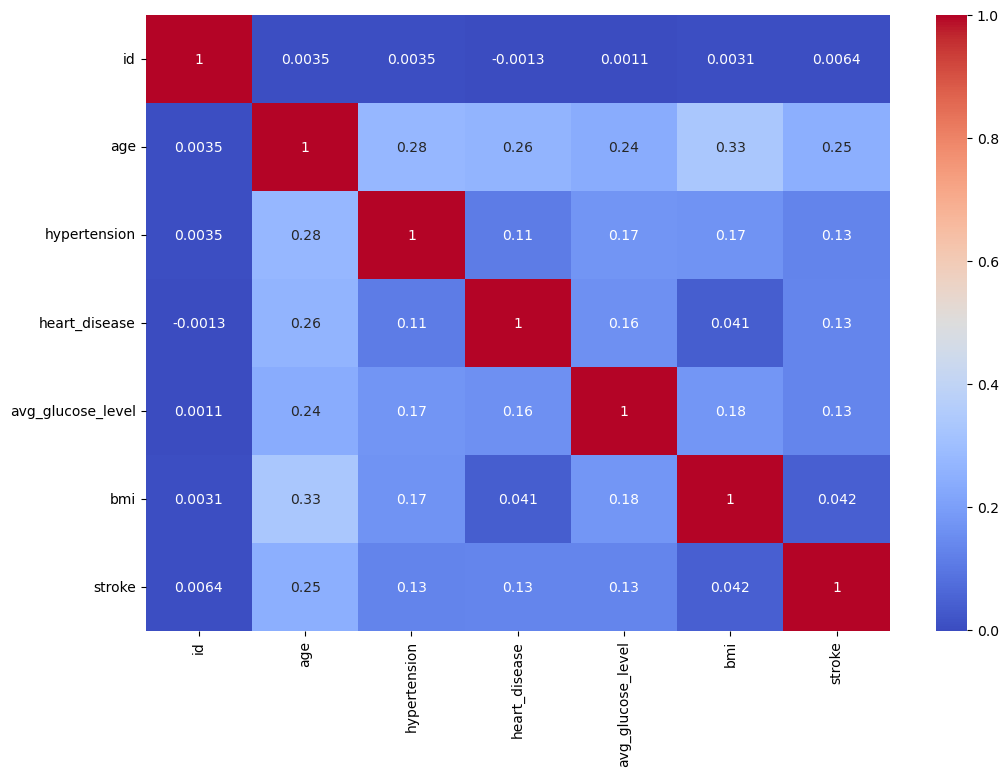

In [41]:
numeric_data2 = stroke_data2.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data2.corr(), annot=True, cmap='coolwarm')
plt.show()

**Data cleaning :**

In [42]:
stroke_data2['bmi'].fillna(stroke_data2['bmi'].mean(), inplace=True)
stroke_data2['smoking_status'].fillna(stroke_data2['smoking_status'].mode().iloc[0], inplace=True)
stroke_data2 = pd.get_dummies(stroke_data2, drop_first=True)
print(stroke_data2.isnull().sum())

id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Male                       0
gender_Other                      0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64


**Creating train test values**

In [43]:
X2 = stroke_data2.drop('stroke', axis=1) 
y2 = stroke_data2['stroke']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

**Random Forest model :**

In [32]:
rf_model2 = RandomForestClassifier(random_state=42)

param_grid2 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search2 = GridSearchCV(rf_model2, param_grid2, cv=5, scoring='accuracy')
grid_search2.fit(X_train2, y_train2)

best_model2 = grid_search2.best_estimator_

best_model2.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=20, random_state=42)

**Predictions :**

Accuracy: 0.9393346379647749
Confusion Matrix:
[[960   0]
 [ 62   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\Users\hilal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hilal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hilal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


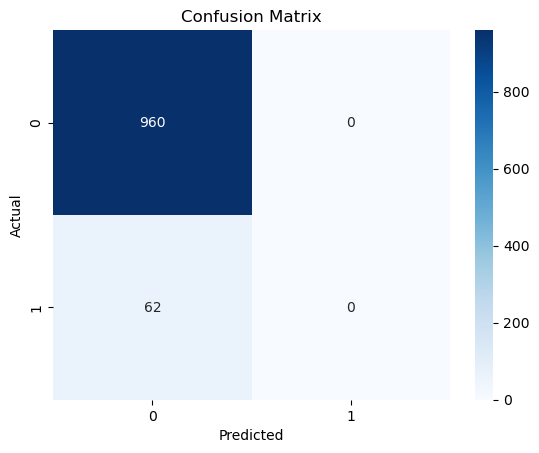

In [33]:
y_pred2 = best_model2.predict(X_test2)

accuracy2 = accuracy_score(y_test2, y_pred2)
conf_matrix2 = confusion_matrix(y_test2, y_pred2)
class_report2 = classification_report(y_test2, y_pred2)

print(f'Accuracy: {accuracy2}')
print('Confusion Matrix:')
print(conf_matrix2)
print('Classification Report:')
print(class_report2)

sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Hyper-parameter optimization :**

In [44]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

**Find the best estimator :**

In [45]:
best_model = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')
y_pred2 = best_model.predict(X_test2)

accuracy2 = accuracy_score(y_test2, y_pred2)
conf_matrix2 = confusion_matrix(y_test2, y_pred2)
class_report2 = classification_report(y_test2, y_pred2)

print(f'Accuracy: {accuracy2}')
print('Confusion Matrix:')
print(conf_matrix2)
print('Classification Report:')
print(class_report2)

Best parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.9393346379647749
Confusion Matrix:
[[960   0]
 [ 62   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\Users\hilal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hilal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hilal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**View the results with a Confusion matrix :**

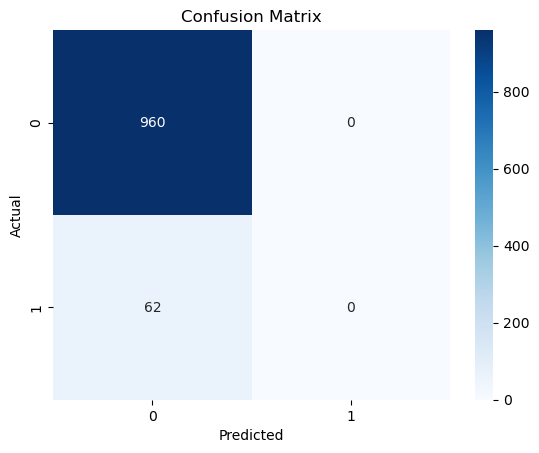

In [46]:
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Question 3 :

***Investigate the diamond dataset to uncover clustering patterns among diamonds, focusing on
features like carat weight, cut quality, color grade, and clarity grade. Your goal is to gain insights
into the likely clusters formed by diamonds based on these characteristics. To achieve this, you'll
employ the K Means algorithm to identify any inherent grouping tendencies within the dataset***

**Importing Libraries :**

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

**Loading datasets :**

In [4]:
diamond_data3 = pd.read_csv('diamonds.csv')
data_dict3 = pd.read_excel('Data Dictionary - diamonds.xlsx')

**First rows of the dataset**

In [5]:
print(diamond_data3.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


**Data dictionary :**

In [6]:
print(data_dict3)

    Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0          NaN         NaN         NaN         NaN         NaN         NaN   
1          NaN         NaN         NaN         NaN         NaN         NaN   
2          NaN         NaN         NaN         NaN         NaN         NaN   
3          NaN         NaN         NaN         NaN         NaN         NaN   
4          NaN         NaN         NaN         NaN         NaN         NaN   
5          NaN         NaN         NaN         NaN         NaN         NaN   
6          NaN         NaN         NaN         NaN         NaN         NaN   
7          NaN         NaN         NaN         NaN         NaN         NaN   
8          NaN         NaN         NaN         NaN         NaN         NaN   
9          NaN         NaN         NaN         NaN         NaN         NaN   
10         NaN         NaN         NaN         NaN         NaN         NaN   
11         NaN         NaN         NaN         NaN         NaN  

**Basic information :**

In [7]:
print(diamond_data3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None


**Statistics**

In [8]:
print(diamond_data3.describe())

         Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000     

**Let's check for missig values in the dataset :**

In [9]:
print(diamond_data3.isnull().sum())

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


**Show all the graphs**

C:\Users\hilal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


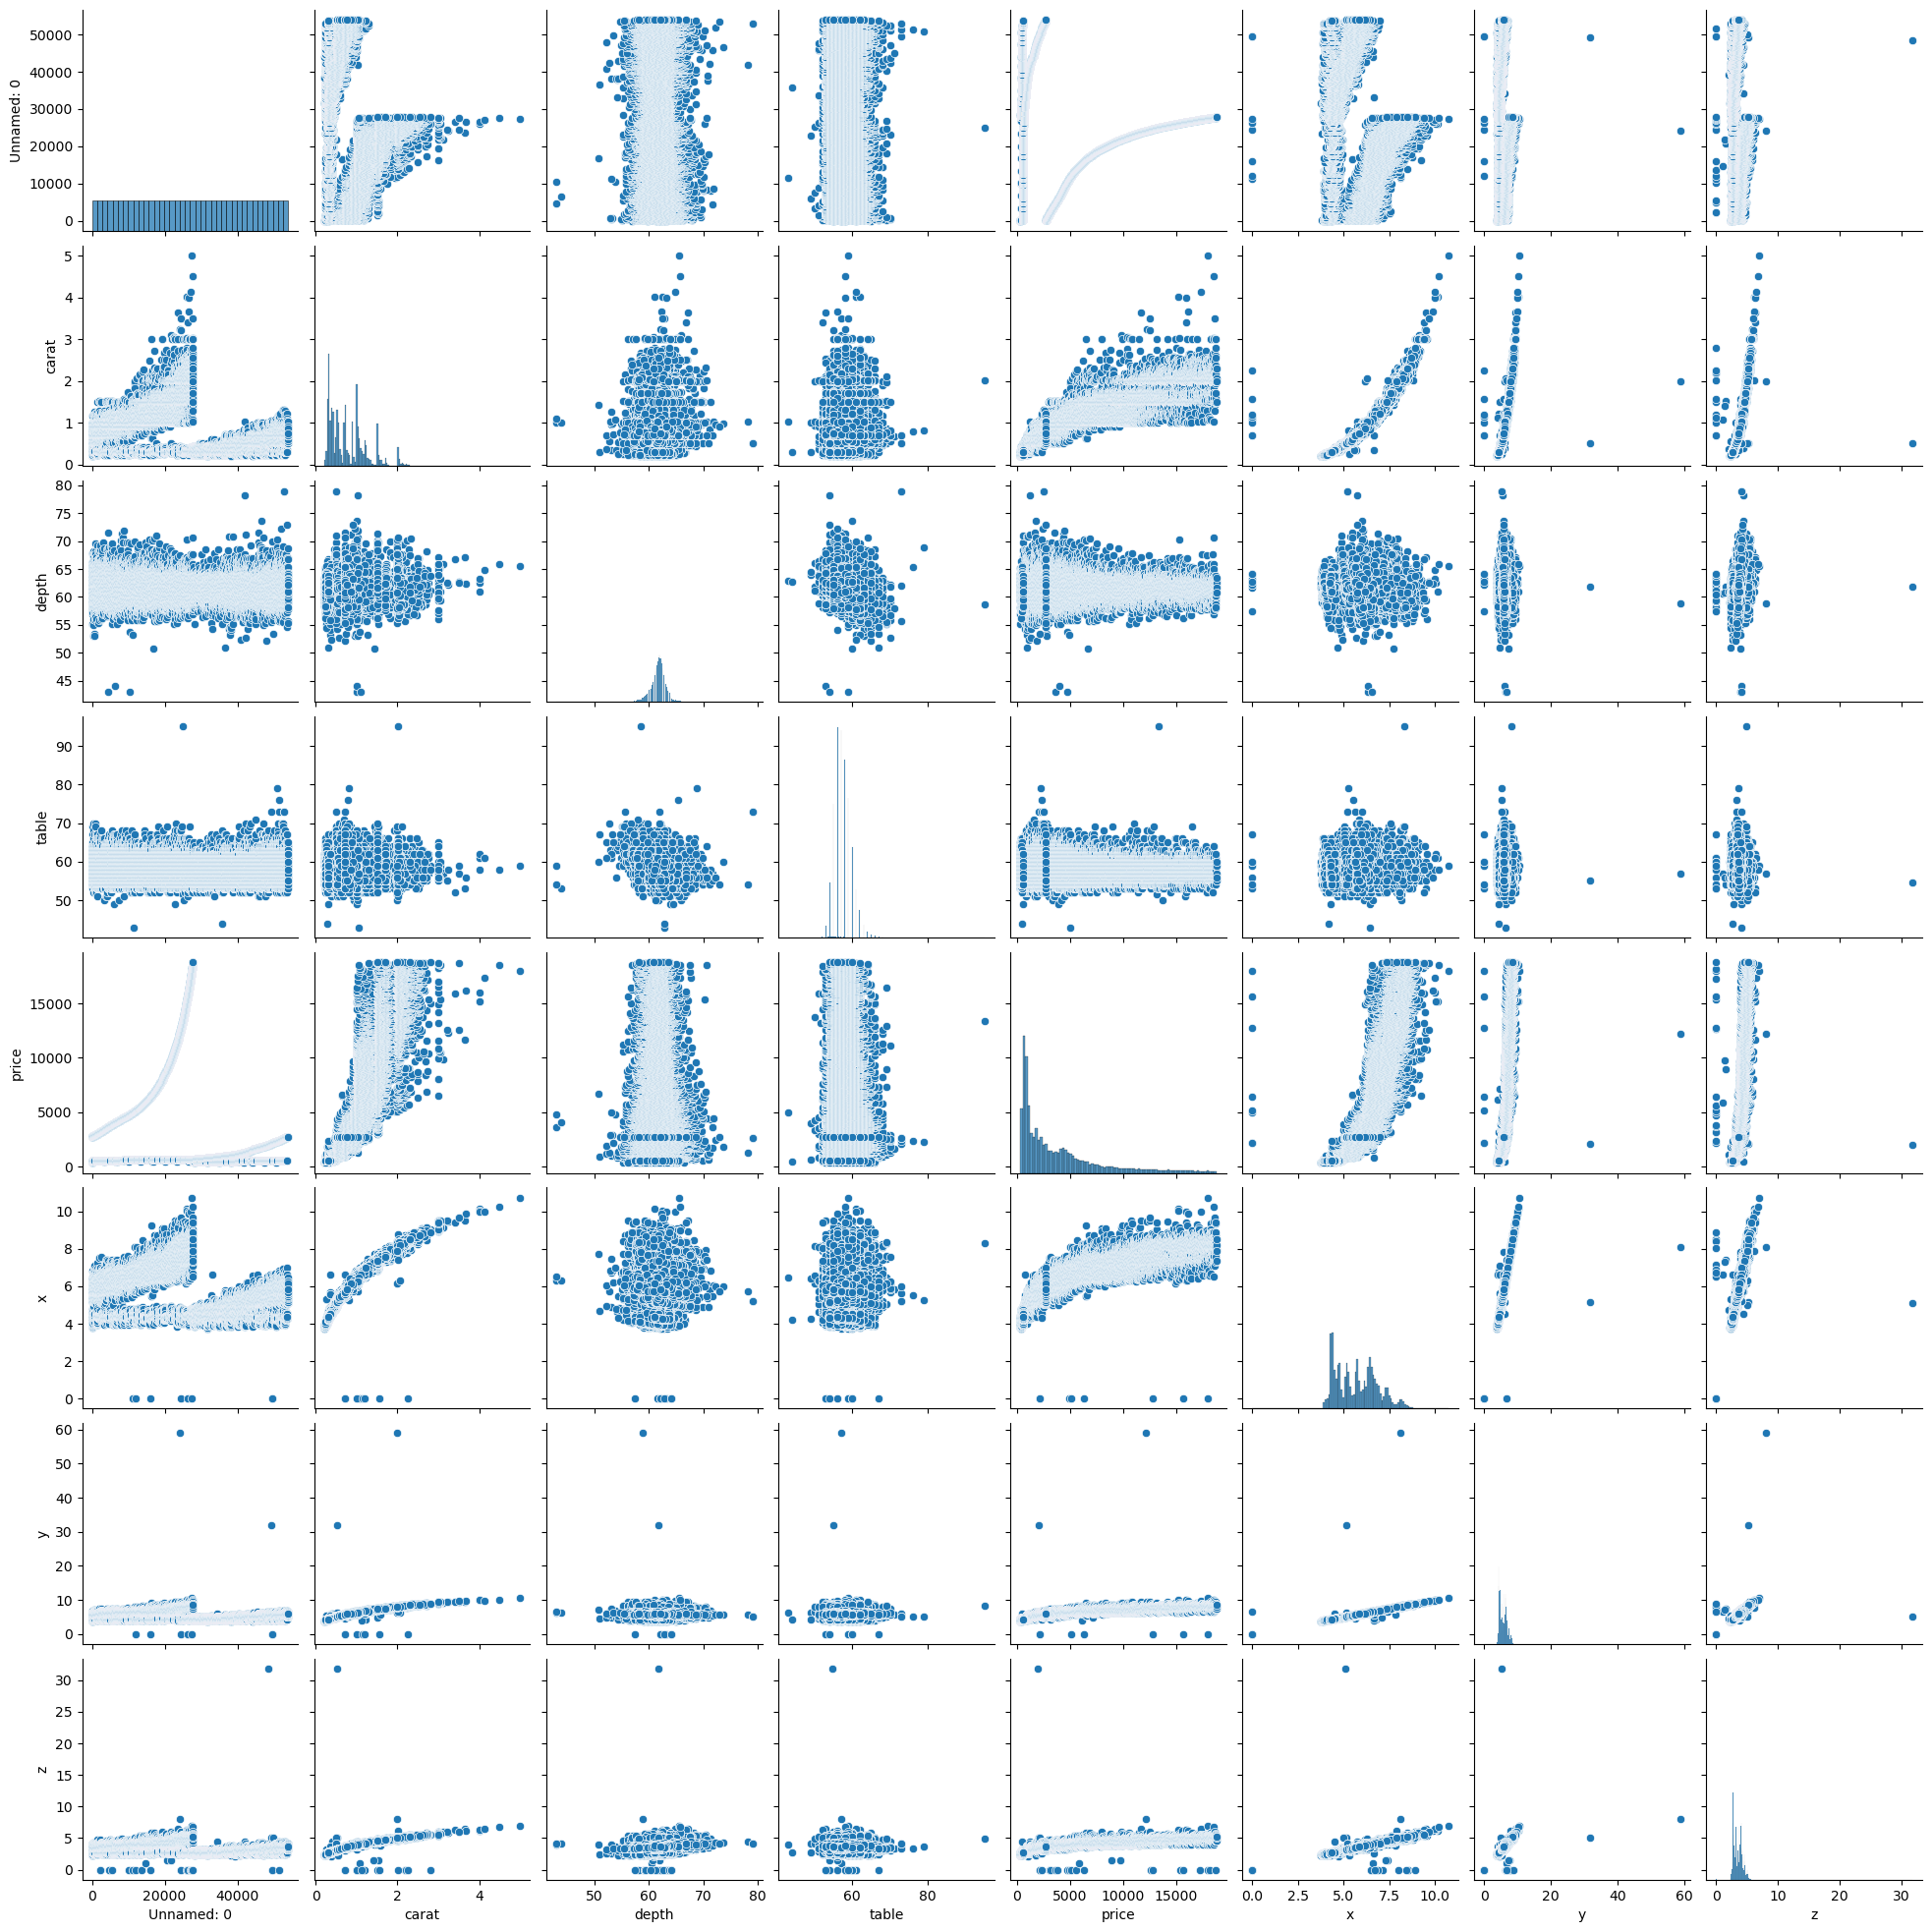

In [10]:
sns.pairplot(diamond_data3)
plt.show()

**Correlation matrix :**

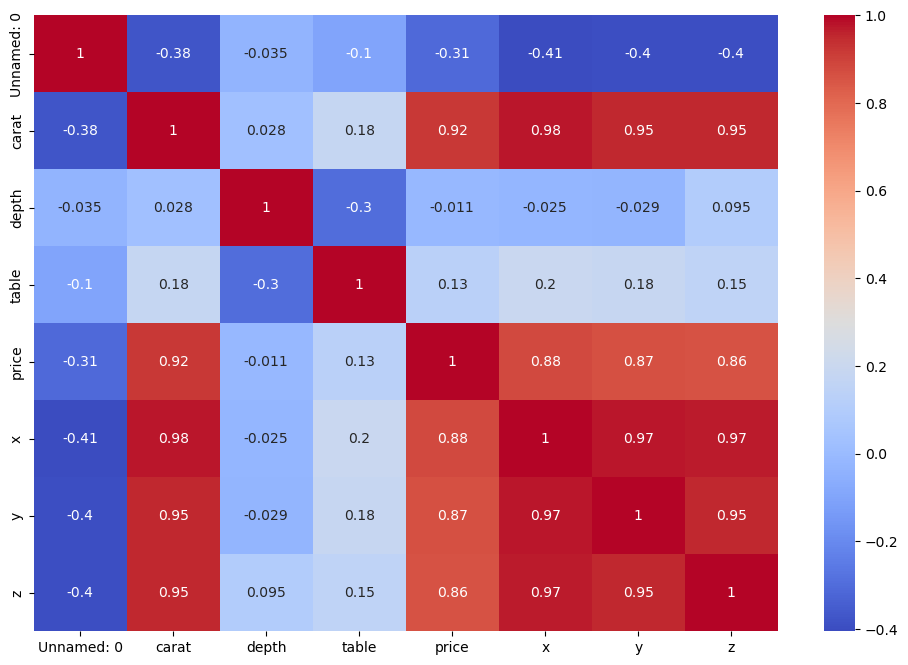

In [11]:
numeric_data3 = diamond_data3.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data3.corr(), annot=True, cmap='coolwarm')
plt.show()

**Handling missing values :**

In [12]:
diamond_data3 = diamond_data3.dropna()
diamond_data3 = pd.get_dummies(diamond_data3, drop_first=True)
print(diamond_data3.isnull().sum())

Unnamed: 0       0
carat            0
depth            0
table            0
price            0
x                0
y                0
z                0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
dtype: int64


**Standardize the features :**

In [13]:
scaler3 = StandardScaler()
scaled_features3 = scaler3.fit_transform(diamond_data3)

**Find the optimal number of clusters using the elbow method**

In [14]:
sse3 = []
for k in range(1, 11):
    kmeans3 = KMeans(n_clusters=k, random_state=42)
    kmeans3.fit(scaled_features3)
    sse3.append(kmeans3.inertia_)

C:\Users\hilal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hilal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hilal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hilal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

**Plot the elbow curve :**

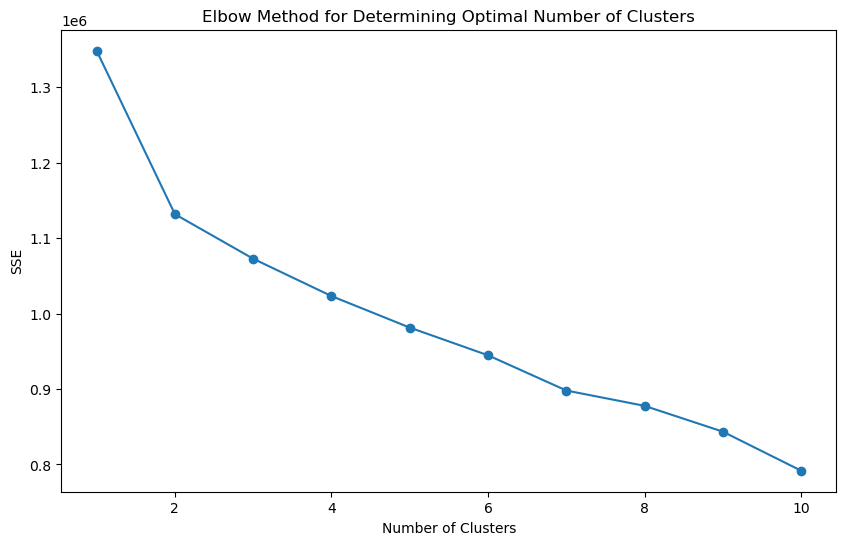

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse3, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.show()

**Fit the model with the good amount of clusters :**

In [16]:
optimal_clusters3 = 3
kmeans3 = KMeans(n_clusters=optimal_clusters3, random_state=42)
clusters3 = kmeans3.fit_predict(scaled_features3)

C:\Users\hilal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**reducing dimensions for visualization :**

In [17]:
pca3 = PCA(n_components=2)
pca_features3 = pca3.fit_transform(scaled_features3)

**Create a DataFrame with PCA components :**

In [18]:
pca_df3 = pd.DataFrame(data=pca_features3, columns=['PC1', 'PC2'])
pca_df3['Cluster'] = clusters3

**View the clusters :**

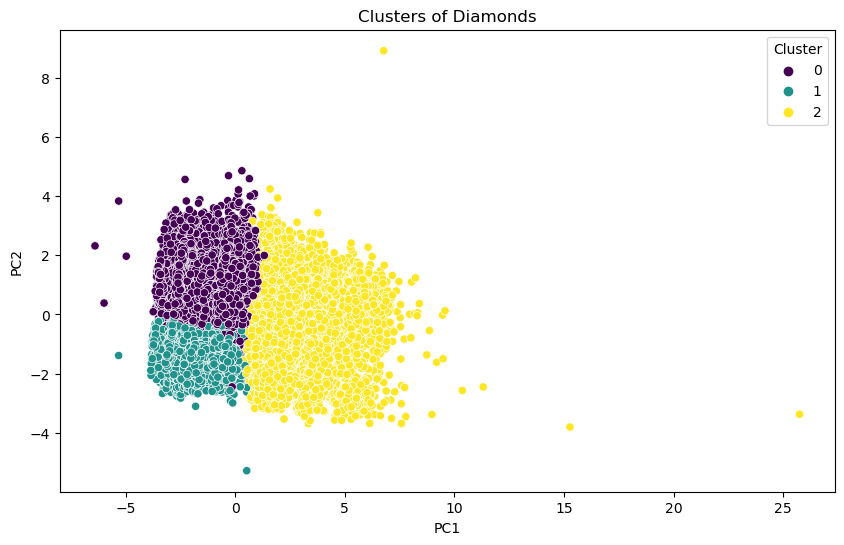

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df3, palette='viridis', legend='full')
plt.title('Clusters of Diamonds')
plt.show()